In [5]:
import tensorflow_datasets as tfds
import tensorflow as tf

def convert_sample(sample):
    image, label = sample['image'], sample['label']  
    image = tf.image.convert_image_dtype(image, tf.float32)
    return image, image  # Use the image itself as the target label

def map_func(sample):
    image = sample['image']
    label = sample['label']
    label = tf.one_hot(label, 2, dtype=tf.float32)
    return image, label



# Corrected file path with escaped backslashes and a missing comma
ds1, ds2, ds3 = tfds.load('patch_camelyon',
                         split=['train[:20%]', 'test[:5%]', 'validation[:5%]'],
                         data_dir=r'C:\Job_og_eksamensbevis\Github\projekter\Projekt_1_Computer_Vision\path_to_data_directory',
                         download=False,
                         shuffle_files=True)

train_dataset       = ds1.map(convert_sample).batch(32)
validation_dataset  = ds3.map(convert_sample).batch(32)
test_dataset        = ds2.map(convert_sample).batch(32)

train_dataset_cnn       = ds1.map(map_func).batch(32)
validation_dataset_cnn  = ds3.map(map_func).batch(32)
test_dataset_cnn        = ds2.map(map_func).batch(32)


In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input, UpSampling2D

def build_autoencoder(input_shape, dropout_rate=0.2):
    input_layer = Input(shape=input_shape)

    # Encoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    encoded_layer = MaxPooling2D((2, 2), padding='same')(x)

    # Decoder (not used in CNN classifier)
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded_layer)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded_layer = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(inputs=input_layer, outputs=decoded_layer)
    encoder = Model(inputs=input_layer, outputs=encoded_layer)

    return autoencoder, encoder

# Build the autoencoder and get the encoder
input_shape = (96, 96, 3)
autoencoder, encoder = build_autoencoder(input_shape)

# Freeze the encoder layers
for layer in encoder.layers:
    layer.trainable = False




In [4]:
def build_cnn(encoder):
    # The output of the encoder is the input for CNN classifier
    cnn_input = encoder.output

    # Build CNN layers similar to the architecture you provided
    x = Conv2D(32, kernel_size=(3, 3), activation="relu")(cnn_input)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, kernel_size=(3, 3), activation="relu")(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = Flatten()(x)
    x = Dense(128, activation="relu")(x)
    cnn_output = Dense(2, activation="softmax")(x)

    # Create CNN model
    cnn_model = Model(inputs=encoder.input, outputs=cnn_output)

    return cnn_model

In [22]:
#CNN dropout 0.2

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

def build_cnn(encoder):
    # The output of the encoder is the input for CNN classifier
    cnn_input = encoder.output

    # Build CNN layers similar to the architecture you provided with dropout rate of 0.2
    x = Conv2D(32, kernel_size=(3, 3), activation="relu")(cnn_input)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.2)(x)  # Adding dropout with a rate of 0.2
    
    x = Conv2D(64, kernel_size=(3, 3), activation="relu")(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.2)(x)  # Adding dropout with a rate of 0.2
    
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = Flatten()(x)
    x = Dropout(0.2)(x)  # Adding dropout with a rate of 0.2
    
    x = Dense(128, activation="relu")(x)
    x = Dropout(0.2)(x)  # Adding dropout with a rate of 0.2
    
    cnn_output = Dense(2, activation="softmax")(x)

    # Create CNN model
    cnn_model = Model(inputs=encoder.input, outputs=cnn_output)

    return cnn_model


In [20]:
#l1 weight regulizer

from keras.regularizers import l1

def build_cnn(encoder):
    # The output of the encoder is the input for CNN classifier
    cnn_input = encoder.output

    # Build CNN layers similar to the architecture you provided
    x = Conv2D(32, kernel_size=(3, 3), activation="relu", kernel_regularizer=l1(0.001))(cnn_input)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, kernel_size=(3, 3), activation="relu", kernel_regularizer=l1(0.001))(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l1(0.001))(x)
    x = Flatten()(x)
    x = Dense(128, activation="relu", kernel_regularizer=l1(0.001))(x)
    cnn_output = Dense(2, activation="softmax")(x)

    # Create CNN model
    cnn_model = Model(inputs=encoder.input, outputs=cnn_output)

    return cnn_model


In [6]:
#l2 weight regulizer
from keras.regularizers import l2

def build_cnn(encoder):
    # The output of the encoder is the input for CNN classifier
    cnn_input = encoder.output

    # Build CNN layers similar to the architecture you provided
    x = Conv2D(32, kernel_size=(3, 3), activation="relu", kernel_regularizer=l2(0.001))(cnn_input)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, kernel_size=(3, 3), activation="relu", kernel_regularizer=l2(0.001))(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001))(x)
    x = Flatten()(x)
    x = Dense(128, activation="relu", kernel_regularizer=l2(0.001))(x)
    cnn_output = Dense(2, activation="softmax")(x)

    # Create CNN model
    cnn_model = Model(inputs=encoder.input, outputs=cnn_output)

    return cnn_model


In [7]:
# Build the CNN model with the encoder
cnn_model = build_cnn(encoder)

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
# Make sure to use train_dataset_cnn, validation_dataset_cnn, and test_dataset_cnn for training, validation, and testing
history = cnn_model.fit(train_dataset_cnn,
                        validation_data=validation_dataset_cnn,
                        epochs=20,
                        batch_size=32)
                        #callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

# Evaluate the CNN model
accuracy = cnn_model.evaluate(test_dataset_cnn, verbose=1)

# You can further plot the training and validation accuracy/loss graphs as needed

Epoch 1/20
1624/1639 [============================>.] - ETA: 0s - loss: 0.7033 - accuracy: 0.7450

KeyboardInterrupt: 

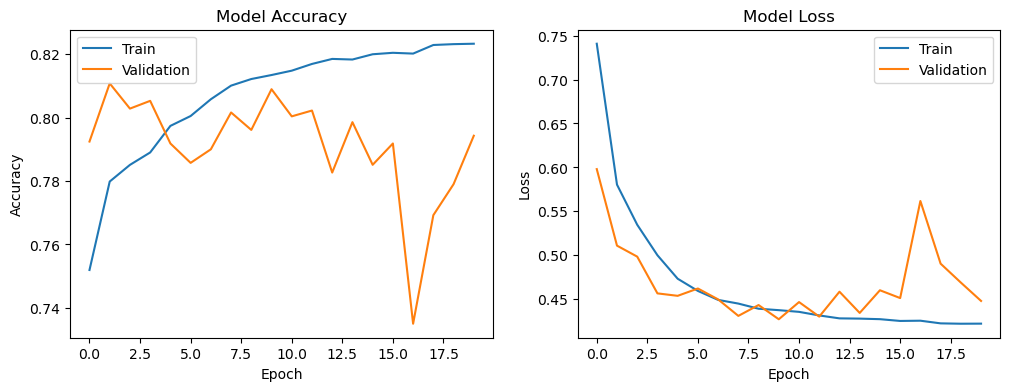

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()